# Sequential 모델(일대다)
* 자주 사용하는 모델은 아님
* 1개를 입력으로 사용하고, 2개 이상의 컬럼이 출력되는 모델 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
x_train = np.array([1,2,3,4,5,6,7,])
y_train = np.array([[1,2,3,4,5,6,7,], [11,12,13,14,15,16,17]])
x_test = np.array([8,9,10])
y_test = np.array([[8,9,10], [18,19,20]])
x_predict = np.array([11,12,13])
print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)
print('x_test.shape : ' , x_test.shape)
print('y_test.shape : ' , y_test.shape)
print('x_predict.shape : ', x_predict.shape )

x_train.shape :  (7,)
y_train.shape :  (2, 7)
x_test.shape :  (3,)
y_test.shape :  (2, 3)
x_predict.shape :  (3,)


In [3]:
y_train = np.transpose(y_train)
y_test = np.transpose(y_test)
print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)
print('x_test.shape : ' , x_test.shape)
print('y_test.shape : ' , y_test.shape)
print('x_predict.shape : ', x_predict.shape )

x_train.shape :  (7,)
y_train.shape :  (7, 2)
x_test.shape :  (3,)
y_test.shape :  (3, 2)
x_predict.shape :  (3,)


## 2. 모델 구성

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(100, input_dim = 1, activation ='relu'))
model.add(Dense(30))
model.add(Dense(5))
model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 3,397
Trainable params: 3,397
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [6]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=1)

Train on 7 samples
Epoch 1/100
7/7 [==============================] - 0s 57ms/sample - loss: 107.1185 - mse: 107.1185
Epoch 2/100
7/7 [==============================] - 0s 1ms/sample - loss: 84.0570 - mse: 84.0570
Epoch 3/100
7/7 [==============================] - 0s 1ms/sample - loss: 65.7724 - mse: 65.7724
Epoch 4/100
7/7 [==============================] - 0s 1ms/sample - loss: 47.0611 - mse: 47.0611
Epoch 5/100
7/7 [==============================] - 0s 997us/sample - loss: 32.3859 - mse: 32.3859
Epoch 6/100
7/7 [==============================] - 0s 1ms/sample - loss: 19.7685 - mse: 19.7685
Epoch 7/100
7/7 [==============================] - 0s 1ms/sample - loss: 11.8938 - mse: 11.8938
Epoch 8/100
7/7 [==============================] - 0s 1ms/sample - loss: 9.8426 - mse: 9.8426
Epoch 9/100
7/7 [==============================] - 0s 1ms/sample - loss: 8.8086 - mse: 8.8086
Epoch 10/100
7/7 [==============================] - 0s 1ms/sample - loss: 7.9809 - mse: 7.9809
Epoch 11/100
7/7 [===

Epoch 87/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.4922 - mse: 0.4922
Epoch 88/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.4069 - mse: 0.4069
Epoch 89/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.3667 - mse: 0.3667
Epoch 90/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.3467 - mse: 0.3467
Epoch 91/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.3276 - mse: 0.3276
Epoch 92/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.2868 - mse: 0.2868
Epoch 93/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.2697 - mse: 0.2697
Epoch 94/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.2459 - mse: 0.2459
Epoch 95/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.2083 - mse: 0.2083
Epoch 96/100
7/7 [==============================] - 0s 1ms/sample - loss: 0.2163 - mse: 0.2163
Epoch 97/100
7/7 [==============================] 

## 4. 학습 과정 살펴보기 

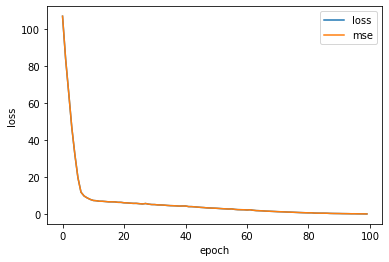

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')

## 5. 평가 예측

In [8]:
loss, mse = model.evaluate(x_test, y_test, batch_size=1)
print("mse : ", mse)
y_predict = model.predict(x_predict)
print("데이터 :",x_predict ,"예측값 : \n", y_predict)

3/3 [==============================] - 0s 13ms/sample - loss: 0.4946 - mse: 0.4946
mse :  0.49464497
데이터 : [11 12 13] 예측값 : 
 [[ 9.823691 21.817692]
 [10.639908 22.951633]
 [11.456122 24.085573]]
